# Project: A Look at AirBnB Homes in Capetown

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#understanding">Data Understanding</a></li>
<li><a href="#preparation">Data Preparation</a></li>
<li><a href="#exploration">Data Exploration</a></li>    
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
>Cape Town is the second most populous city in South Africa. The capital of Western Cape Province, it is also the legislative capital of the nation. Cape Town is on South Africa's southwestern coast close to the Cape of Good Hope, and is the southernmost city on the African continent.
>
> I will be taking a look at the airbnb dataset provided for the city provided on http://insideairbnb.com/, and see how I can gain  various insights.
>
>Here are some questions I hope to answer through the analysis of this  dataset
>
>1) What are the various room types listed on Airbnb in Capetown.
>
>2) What are the most popular property types in the city.
>
>3) What is the average price for the various room types.
>
>4) A look at availibility of Listings in a year.
>
>5) How many percent of listings are superhosts.





<a id='understanding'></a>
## Data Understanding

In [1]:
# import statements
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read in datasets
neighbour_df = pd.read_csv('neighbourhoods.csv')
reviews_df = pd.read_csv('reviewsnew.csv')
listings_df = pd.read_csv('listingsnew.csv')

In [3]:
# View datasets
neighbour_df.head()
reviews_df.head()
listings_df.head()

,neighbourhood_group,neighbourhood
0,NaN,Ward 1
1,NaN,Ward 10
2,NaN,Ward 100
3,NaN,Ward 101
4,NaN,Ward 102


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,3191,4888238,2013-05-31,5737473,Kathleen,Great home away from home! Bridgette and Marth...
1,3191,9128602,2013-12-09,8170322,Anita,Das Cottage liegt ruhig und sicher. Wir haben...
2,3191,9924130,2014-01-20,4039279,Zacki,This cottage was a great base from which to ex...
3,3191,16659537,2014-07-31,9729939,Doug,I had a great stay. All my needs were well ex...
4,3191,23247470,2014-11-26,9681619,Christopher,Excellent host. She provided everything we cou...


,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3191,https://www.airbnb.com/rooms/3191,20201026144614,2020-10-26,Malleson Garden Cottage,"This is a lovely, separate, self-catering cott...","Mowbray is on the Southern Suburbs line, 6km (...",https://a0.muscache.com/pictures/697022/385407...,3754,https://www.airbnb.com/users/show/3754,...,10.0,10.0,10.0,NaN,t,1,1,0,0,0.60
1,15007,https://www.airbnb.com/rooms/15007,20201026144614,2020-10-26,Blaauwberg House,Welcome to our self-catering beach-front famil...,"Bloubergstrand is a lovely, cosy suburb near C...",https://a0.muscache.com/pictures/3b654aa4-248e...,59072,https://www.airbnb.com/users/show/59072,...,10.0,10.0,10.0,NaN,f,7,7,0,0,0.33
2,15077,https://www.airbnb.com/rooms/15077,20201026144614,2020-10-27,Top relaxed beach living in style,Situated either on the ground floor with direc...,It is probably the best hub in order to explor...,https://a0.muscache.com/pictures/4a8fceaa-655e...,59342,https://www.airbnb.com/users/show/59342,...,10.0,10.0,10.0,NaN,f,5,1,4,0,0.05
3,15180,https://www.airbnb.com/rooms/15180,20201026144614,2020-10-27,The Melkbaai - Beachfront,Comfortable and safe self catering flat for 2 ...,"Apartment is located in Beach Road, Strand, We...",https://a0.muscache.com/pictures/e679464f-f75d...,59663,https://www.airbnb.com/users/show/59663,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
4,15199,https://www.airbnb.com/rooms/15199,20201026144614,2020-10-26,Self catering apartment,<b>The space</b><br />Amenities :<br />Welcome...,NaN,https://a0.muscache.com/pictures/142776/5b6c9e...,59694,https://www.airbnb.com/users/show/59694,...,10.0,10.0,8.0,NaN,f,1,1,0,0,0.02


In [4]:
# View datatypes in datasets
neighbour_df.dtypes
reviews_df.dtypes
listings_df.dtypes

neighbourhood_group    float64
neighbourhood           object
dtype: object

listing_id        int64
id                int64
date             object
reviewer_id       int64
reviewer_name    object
comments         object
dtype: object

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
name                                             object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 74, dtype: object

In [5]:
# Column names in listings_df
list(listings_df.columns.values)

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'description',
 'neighborhood_overview',
 'picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'latitude',
 'longitude',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bathrooms_text',
 'bedrooms',
 'beds',
 'amenities',
 'price',
 'minimum_nights',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'calendar_updated',
 'has_availability',
 'availability_30',
 'availa

In [6]:
# Printing unique values for string columns

for col in listings_df[['neighbourhood', 'room_type','property_type','license']]:
    print('Unique values in column: %s' %col)
    print(listings_df[col].unique()), '\n'

Unique values in column: neighbourhood
['Southern Suburbs, Western Cape, South Africa'
 'Cape Town, Western Cape, South Africa' nan
 'Bellville, Western Cape, South Africa'
 'Durbanville, Western Cape, South Africa'
 'Fish Hoek, Western Cape, South Africa'
 'Blouberg, Western Cape, South Africa'
 'Green Point, , Cape Town, South Africa'
 'Hout Bay, Western Cape, South Africa'
 'Cape Town, Western Province, South Africa' 'Cape Town, South Africa'
 'Panorama, South Africa' 'Green Point, Western Cape, South Africa'
 'Noordhoek, Cape Town, Western Cape, South Africa'
 'Cape Town, WC, South Africa' 'Bakoven, South Africa, South Africa'
 'Milnerton, Western Cape, South Africa'
 "Simon's Town, Western Cape, South Africa"
 'Sea Point, Western Cape, South Africa' 'Cape Town, 8001, South Africa'
 'Bloubergstrand, Western Cape, South Africa'
 'Bantry Bay Cape Town, Western Cape, South Africa'
 'Green Point, Cape Town, Western Cape, South Africa'
 'Khayelitsha , WC, South Africa' 'Scarborough , Wc

(None, '\n')

Unique values in column: room_type
['Entire home/apt' 'Private room' 'Shared room' 'Hotel room']


(None, '\n')

Unique values in column: property_type
['Entire guesthouse' 'Entire house' 'Private room in apartment'
 'Entire apartment' 'Private room' 'Entire guest suite' 'Entire villa'
 'Private room in house' 'Shared room in apartment'
 'Private room in guesthouse' 'Room in serviced apartment' 'Entire loft'
 'Private room in guest suite' 'Private room in bed and breakfast'
 'Private room in villa' 'Entire bungalow' 'Room in bed and breakfast'
 'Entire cottage' 'Entire condominium' 'Entire serviced apartment'
 'Private room in serviced apartment' 'Room in hotel'
 'Private room in condominium' 'Entire townhouse' 'Private room in hostel'
 'Private room in townhouse' 'Room in boutique hotel' 'Entire cabin'
 'Private room in loft' 'Entire chalet' 'Room in aparthotel'
 'Entire place' 'Tiny house' 'Private room in cottage' 'Island'
 'Shared room in hostel' 'Shared room in bed and breakfast'
 'Entire bed and breakfast' 'Shared room in loft'
 'Private room in bungalow' 'Shared room in house'
 'Private ro

(None, '\n')

Unique values in column: license
[nan]


(None, '\n')

In [7]:
# Size of datasets
neighbour_df.shape
reviews_df.shape
listings_df.shape

(116, 2)

(288322, 6)

(18723, 74)

In [8]:
# Percentage of null values in each column of the datasets
neighbour_df.isnull().sum()*100/len(neighbour_df)
reviews_df.isnull().sum()*100/len(reviews_df)
listings_df.isnull().sum()*100/len(listings_df)

neighbourhood_group    100.0
neighbourhood            0.0
dtype: float64

listing_id       0.000000
id               0.000000
date             0.000000
reviewer_id      0.000000
reviewer_name    0.000000
comments         0.046476
dtype: float64

id                                               0.000000
listing_url                                      0.000000
scrape_id                                        0.000000
last_scraped                                     0.000000
name                                             0.000000
                                                  ...    
calculated_host_listings_count                   0.000000
calculated_host_listings_count_entire_homes      0.000000
calculated_host_listings_count_private_rooms     0.000000
calculated_host_listings_count_shared_rooms      0.000000
reviews_per_month                               29.290178
Length: 74, dtype: float64

In [9]:
# List columns with 75% missing values in listings_df
listings_df.columns[listings_df.isnull().mean()>0.70]

Index(['host_neighbourhood', 'neighbourhood_group_cleansed', 'bathrooms',
       'calendar_updated', 'license'],
      dtype='object')

In [10]:
# Provide a pandas series of the counts for each amenities in listings_df
amenities_vals = listings_df.amenities.value_counts() 
# assure this looks right
amenities_vals 

[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          57
["Cable TV", "Air conditioning", "Essentials", "TV", "Wifi"]                                                                                                                                                                                                                                                                                                                                                                                                                             

<a id='preparation'></a>
## Data Preparation

In [11]:
# Convert date in reviews_df to datetime
reviews_df['date'] = pd.to_datetime(reviews_df['date'], format='%Y-%m-%d')
reviews_df.dtypes
reviews_df.head()

listing_id                int64
id                        int64
date             datetime64[ns]
reviewer_id               int64
reviewer_name            object
comments                 object
dtype: object

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,3191,4888238,2013-05-31,5737473,Kathleen,Great home away from home! Bridgette and Marth...
1,3191,9128602,2013-12-09,8170322,Anita,Das Cottage liegt ruhig und sicher. Wir haben...
2,3191,9924130,2014-01-20,4039279,Zacki,This cottage was a great base from which to ex...
3,3191,16659537,2014-07-31,9729939,Doug,I had a great stay. All my needs were well ex...
4,3191,23247470,2014-11-26,9681619,Christopher,Excellent host. She provided everything we cou...


In [12]:
# Fill null values with zero in reviews_per_month,host_name column
listings_df['reviews_per_month'].fillna(value=0, inplace=True)
listings_df['host_name'].fillna(value=0, inplace=True)

In [16]:
# Drop two null rows in host_is_superhost column
listings_df.dropna(subset=['host_is_superhost'],inplace =True)

In [19]:
# Remove $ and , from price df
listings_df['price'] = listings_df['price'].str.replace('$', '')
listings_df['price'] = listings_df['price'].str.replace(',', '')
listings_df["price"] = listings_df.price.astype(float)
listings_df['price']

0           551.0
1          2115.0
2          1152.0
3           600.0
4        125000.0
           ...   
18718       453.0
18719      3050.0
18720       560.0
18721       600.0
18722      3000.0
Name: price, Length: 18721, dtype: float64

<a id='exploration'></a>
## Data Exploration

###### 1) What are the various room types listed on Airbnb in Capetown.

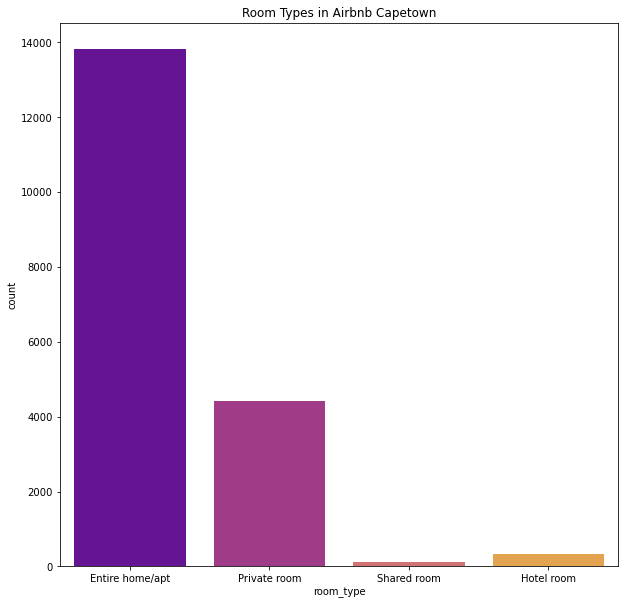

In [22]:
# Room types in airbnb capetown
sns.countplot(listings_df['room_type'], palette="plasma");
fig = plt.gcf();
fig.set_size_inches(10,10);
plt.title('Room Types in Airbnb Capetown');

###### 2) What are the most popular property types in the city.

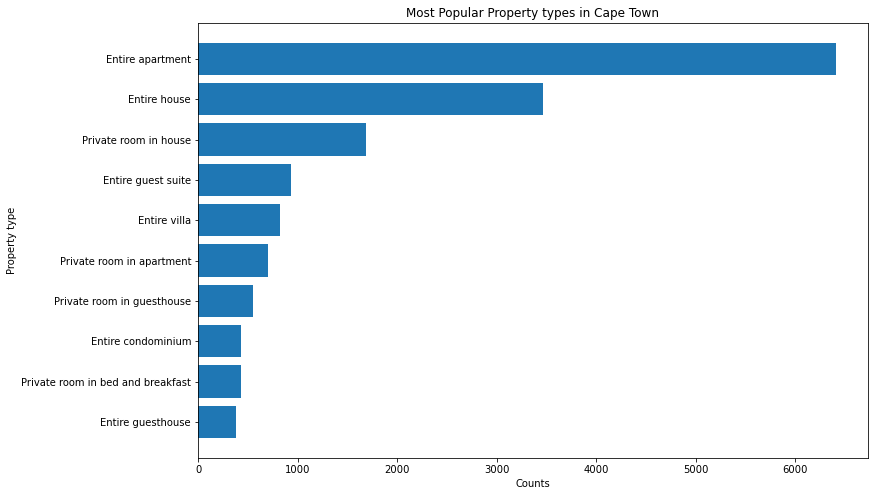

In [23]:
# Popular Property types in Capetown
data = listings_df.property_type.value_counts()[:10]
plt.figure(figsize=(12, 8))
x = list(data.index)
y = list(data.values)
x.reverse()
y.reverse()

plt.title("Most Popular Property types in Cape Town")
plt.ylabel("Property type")
plt.xlabel("Counts")

plt.barh(x, y);

###### 3) What is the average price for the various room types.

In [24]:
# Average price of rooms
avg_price = listings_df.groupby("room_type")["price"].mean().sort_values(ascending = False).reset_index()
avg_price

,room_type,price
0,Hotel room,2923.197640
1,Entire home/apt,2690.262275
2,Private room,1184.946917
3,Shared room,507.404762


[Text(0, 0, 'Hotel room'),
 Text(0, 0, 'Entire home/apt'),
 Text(0, 0, 'Private room'),
 Text(0, 0, 'Shared room')]

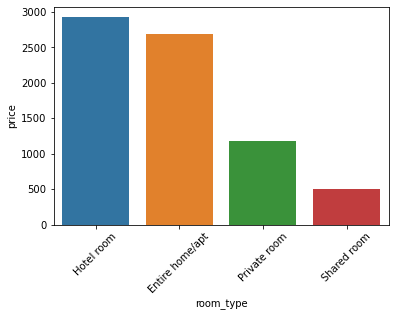

In [25]:
ax = sns.barplot(x="room_type", y="price", data=avg_price)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

##### 4) Availability of listings in a year..

<Figure size 864x576 with 0 Axes>

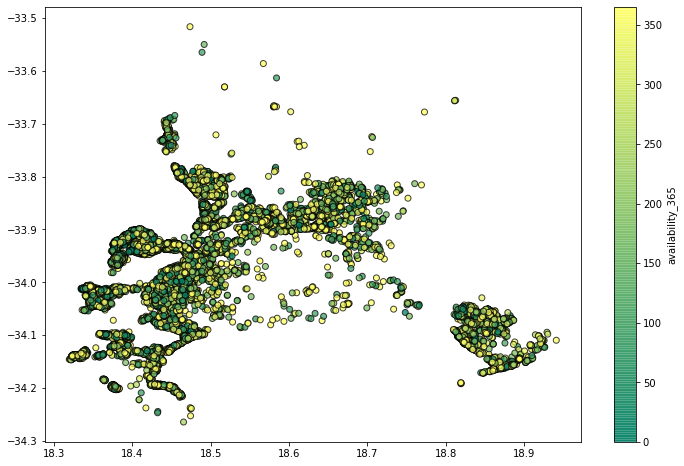

In [27]:
# Plot showing listings availability in a year
plt.figure(figsize=(12, 8))
plt.scatter(listings_df.longitude, listings_df.latitude, c=listings_df.availability_365, cmap='summer', edgecolor='black', linewidth=1, alpha=0.75);

cbar = plt.colorbar()
cbar.set_label('availability_365')

In [21]:
# Proportion of superhosts in capetown
dummy_cols_df = pd.get_dummies(listings_df['host_is_superhost'])
dummy_cols_df
dummy_cols_df['t'].mean()*100

25.639656001281985